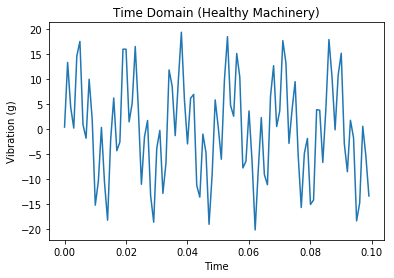

In [11]:
import numpy as np
from scipy import pi
import matplotlib.pyplot as plt
%matplotlib inline

# Sampling rate and time vector
start_time = 0 # seconds
end_time = 2 # seconds
sampling_rate = 1000 # Hz
N = (end_time - start_time)*sampling_rate # array size

# Frequency domain peaks
peak1_hz = 60 # Hz where the peak occurs
peak1_mag = 10 # magnitude of the peak
peak2_hz = 270 # Hz where the peak occurs
peak2_mag = 10 # magnitude of the peak

# Noise control
noise_loc = 0 # the Gaussian noise is mean-centered
noise_mag = 0.5 # magnitude of added noise

# Vibration data generation
time   = np.linspace(start_time, end_time, N)
vib_data = peak1_mag*np.sin(2*pi*peak1_hz*time) + \
           peak2_mag*np.sin(2*pi*peak2_hz*time) + \
           np.random.normal(0, noise_mag, N) 

# Data plotting
plt.plot(time[0:100], vib_data[0:100])
plt.xlabel('Time')
plt.ylabel('Vibration (g)')
plt.title('Time Domain (Healthy Machinery)');

In [12]:
np.linspace(start_time, end_time, N)

array([0.00000000e+00, 1.00050025e-03, 2.00100050e-03, ...,
       1.99799900e+00, 1.99899950e+00, 2.00000000e+00])

In [13]:
len(vib_data)

2000

In [14]:
vib_data

array([  0.3800927 ,  13.30121886,   4.35223596, ...,  -4.86797442,
       -13.68724659,  -0.19255256])

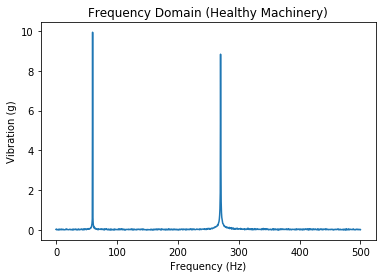

In [15]:
from scipy.fftpack import fft

# Nyquist Sampling Criteria
T = 1/sampling_rate # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# FFT algorithm
yr = fft(vib_data) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only

# Plotting the results
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');